In [1]:
%matplotlib inline

In [60]:
# Set python path here
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
import caffe
import direct_intrinsics as di
import PIL.Image

In [3]:
# trained on sintel_scenes['train']
# modelfile = 'sintel_mit2_scale_1_2_v19_albedo_shading_epoch15000_lr0.002_do0.5_lambda1_iter_50000.caffemodel'
# trained on sintel_scenes['test']
modelfile = 'sintel_final_test.caffemodel'

# Load net
net = caffe.Net('direct_intrinsics.prototxt', modelfile, caffe.TEST)

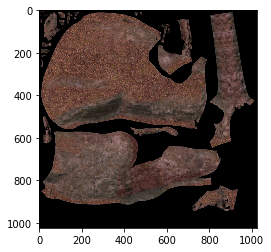

In [108]:
# Load an image
# scene_id = 0
# scene = di.sintel_scenes['train'][scene_id]
# scene = di.sintel_scenes['test'][scene_id]
# print scene
root = '/media/zhongxia/Windows/Users/zhong/Documents/code/unity_delighting/'
img = PIL.Image.open(root + 'data/Rock/Mesh_000000/V_000000/Rock_Mesh_000000_V_000000_Lit.tga')
img = np.array(img)
img = img[:, :, :3] * (img[:, :, 3:] > 0)
plt.imshow(img)
plt.show()
img = img[:, :, ::-1]

In [93]:
# Predict by Direct intrinsics CNN
a, s = di.predict(net, img)

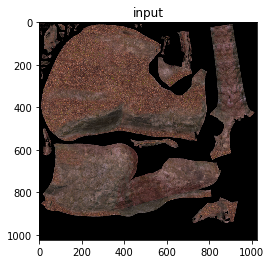

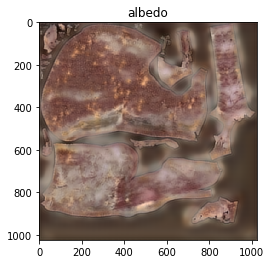

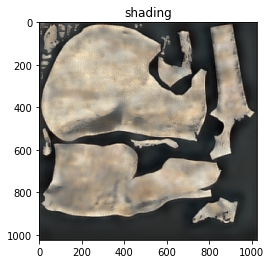

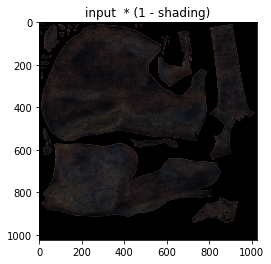

In [113]:
# Display results
plt.figure()
plt.title('input')
plt.imshow(di.bgr2rgb(img))
plt.figure()
plt.title('albedo')
plt.imshow((a * 255).astype(np.uint8))
plt.figure()
plt.title('shading')
plt.imshow((s * 255).astype(np.uint8))
plt.figure()
plt.title('input  * (1 - shading)')
input_sub_shading = di.bgr2rgb(img) * (1 - s)
input_sub_shading[input_sub_shading < 0] = 0
input_sub_shading[input_sub_shading > 255] = 255
plt.imshow(input_sub_shading.astype(np.uint8))